<a href="https://colab.research.google.com/github/Mikolaj0508/Solar-Tracker/blob/main/mppt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/praca dyplomowa/chart.csv")

In [ ]:
df.set_index('ID', inplace=True)

In [ ]:
mppt = df.loc[(df["TIMESTAMP"]>="2022-12-15 15:52:35") & (df["TIMESTAMP"]<="2022-12-15 16:01:28")]

In [ ]:
mppt.head()

,TEXT_REQ,INT_REQ,SERVO_POS,LOAD_VOLT [V],CURRENT [mA],POWER [mW],TIMESTAMP
ID,,,,,,,
914,M,0,90,1.03,61.0,62,2022-12-15 15:52:35
915,M,0,125,1.04,78.9,82,2022-12-15 15:52:43
916,M,0,55,1.06,2.8,4,2022-12-15 15:52:51
917,M,0,145,1.03,115.4,118,2022-12-15 15:52:59
918,M,0,165,0.99,118.9,118,2022-12-15 15:53:09


In [ ]:
mppt.columns

Index(['TEXT_REQ', 'INT_REQ', 'SERVO_POS', 'LOAD_VOLT [V] ', 'CURRENT [mA]',
       'POWER [mW]', 'TIMESTAMP'],
      dtype='object')

In [ ]:
mppt = mppt[["LOAD_VOLT [V] ","TIMESTAMP"]]

In [ ]:
mppt = mppt.drop(mppt[mppt["POWER [mW]"]<50].index)

KeyError: ignored

In [ ]:
y = mppt['LOAD_VOLT [V] ']
x = mppt['TIMESTAMP']

In [ ]:
y = y.to_numpy()
x = x.to_numpy()

In [ ]:
x = [datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S").timestamp() for date_string in x]
moment_0 = x[0]
x = [i - moment_0 for i in x]

In [ ]:
model = LinearRegression()
x_re = np.array(x).reshape(-1, 1)
reg = model.fit(x_re, y)
x_pred = x_re
y_pred = model.predict(x_pred)

y = 0.00x + 1.02


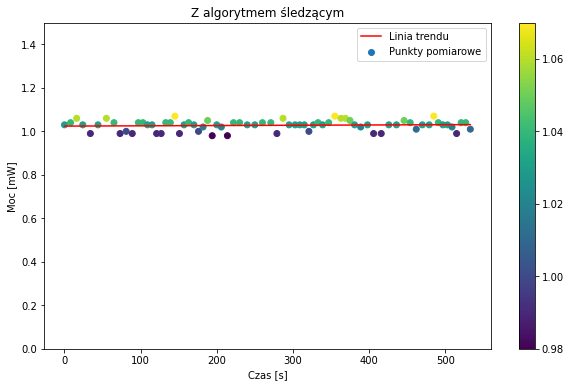

In [ ]:
fig,ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x, y, c=y, label='Punkty pomiarowe', cmap="viridis")
ax.set_title('Z algorytmem śledzącym')
ax.set_xlabel('Czas [s]')
ax.set_ylabel('Moc [mW]')
ax.set_ylim(0,1.5)
fig.colorbar(scatter)

plt.plot(x_pred, y_pred, color='red',label='Linia trendu')
text = f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}'
print(text)
plt.legend()
plt.savefig('mppt.png', dpi=300)
plt.show()

In [ ]:
#trapezoidal rule
area_trap = 0 
for i in range(1,len(x)):
  area_trap += (x[i] - x[i-1]) * (y[i] + y[i-1]) /2
area_trap /= 1000
print(f"{area_trap=} Ws")
#mid point rule
area_mid = 0
for i in range(0,len(x)-1):
  area_mid += (x[i+1] - x[i]) * (y[i] + y[i+1]) /2
area_mid /= 1000 
print(f"{area_mid=} Ws")
#simpson rule
area_simpson =0
for i in range(0,len(x)-2,2):
  area_simpson +=  (x[i+2] - x[i]) * (y[i] + 4*y[i+1] + y[i+2]) / 6
area_simpson /= 1000
print(f"{area_simpson=:.3f} Ws")

area_trap=52.825 Ws
area_mid=52.825 Ws
area_simpson=52.920 Ws
